<a href="https://colab.research.google.com/github/dhirajyadav07/Data-Science/blob/main/Simple_linear_regression_python_implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/height-weight.csv')

Mounted at /content/drive


In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.shape

(23, 2)

In [6]:
df.isnull().sum()

,0
Weight,0
Height,0


In [7]:
df.duplicated().sum()

1

Text(0.5, 1.0, 'Height vs Weight')

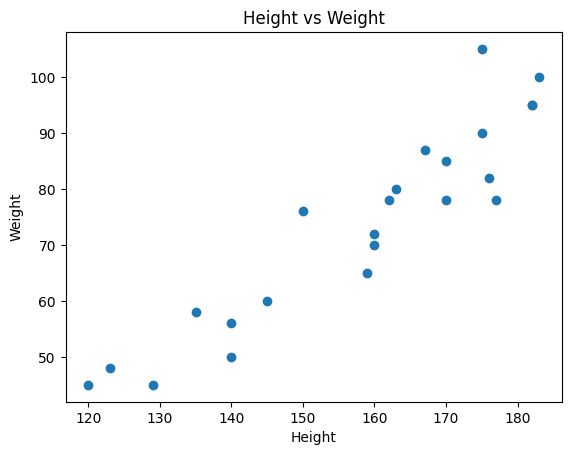

In [8]:
# now i am gonna plot the height and weight as a scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [9]:
# now divide the data into x and y
X=df[['Weight']]
y=df['Height']

In [10]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [11]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [26]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

Text(0.5, 1.0, 'Height vs Weight')

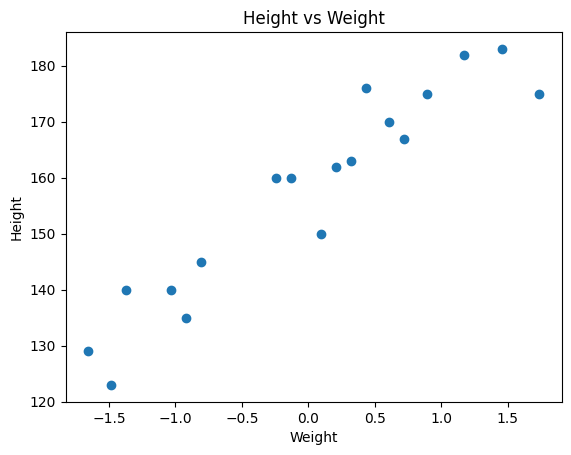

In [29]:
plt.scatter(X_train,y_train)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')

<Axes: ylabel='Weight'>

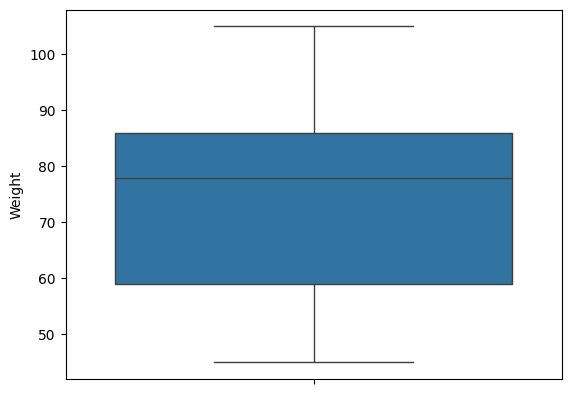

In [16]:
sns.boxplot(df['Weight'])

In [17]:
#no any outliers

In [30]:
#model training
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(X_train)

In [40]:
y_pred

array([187.0869102 , 141.82375282, 182.27168069, 161.08467086,
       132.19329381, 177.45645118, 129.3041561 , 143.74984463,
       153.38030364, 159.15857905, 134.11938561, 139.89766102,
       155.30639545, 172.64122168, 164.93685446, 167.82599217,
       169.75208397, 163.01076266])

Text(0, 0.5, 'Height')

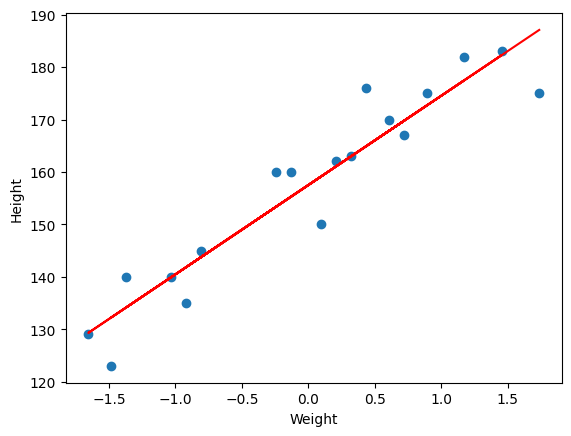

In [41]:
# now draw the function line
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,color='red')
plt.xlabel('Weight')
plt.ylabel('Height')

In [42]:
# now we predict on X_test
y_pred_test=model.predict(X_test)

In [43]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

Text(0, 0.5, 'Height')

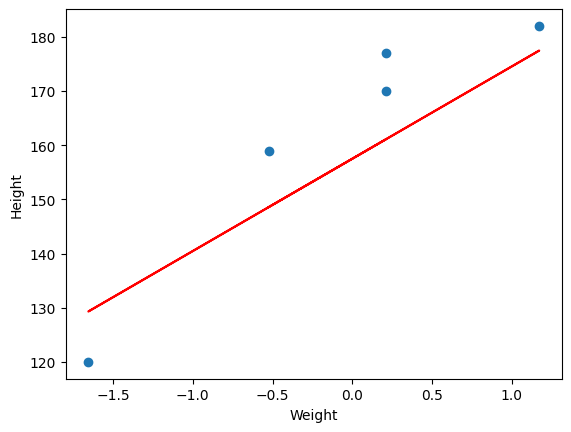

In [44]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test,color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
#

In [51]:
#performance metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('r2_score=',r2_score(y_test,y_pred_test))
print('mean_absolute_error = ',mean_absolute_error(y_test,y_pred_test))
print('mean_squared_error = ',mean_squared_error(y_test,y_pred_test))

r2_score= 0.776986986042344
mean_absolute_error =  9.822657814519232
mean_squared_error =  109.77592599051664


In [54]:
#resudual /error
#error should be normally distributed
error=y_test-y_pred_test

<Axes: xlabel='Height', ylabel='Density'>

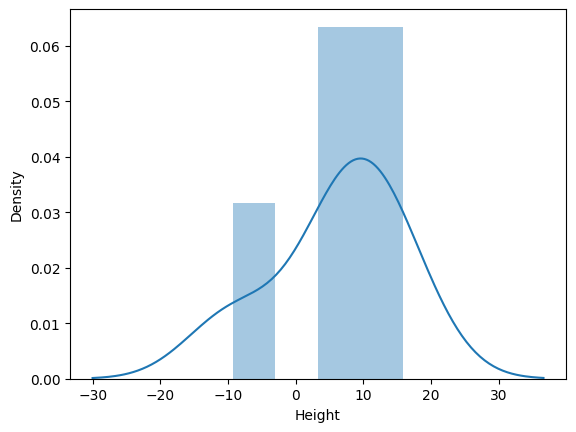

In [55]:
sns.distplot(error)

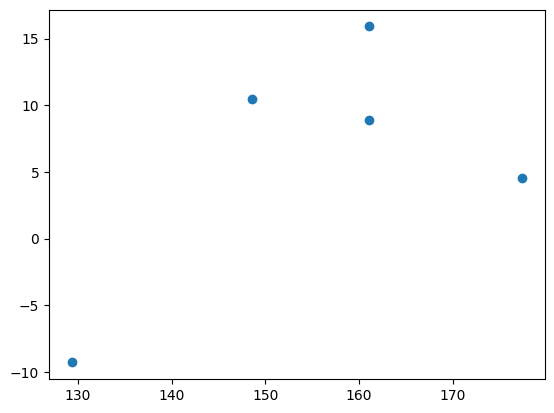

In [56]:
#error should have constant varience
plt.scatter(y_pred_test,error)